# Problem 2: SQL Injection at Different Security Levels

A SQL injection attack consists of insertion or “injection” of a SQL query via the input data from the client to the application. A successful SQL injection exploit can read sensitive data from the database, modify database data, execute administration operations on the database, recover the content of a given file and in some cases issue commands to the operating system.

## Payloads

### Medium Payloads

Burpsuite is a web security testing tool that allows interaction with web traffic to find vulnerabilities in a web application. It includes a proxy server to intercept requests between a browser and a server, which can be used for testing things like input validation, authentication, and authorization.

Once the HTTP request was intercepted, we sent it to the repeater so we could modify the request and send it to the server. 

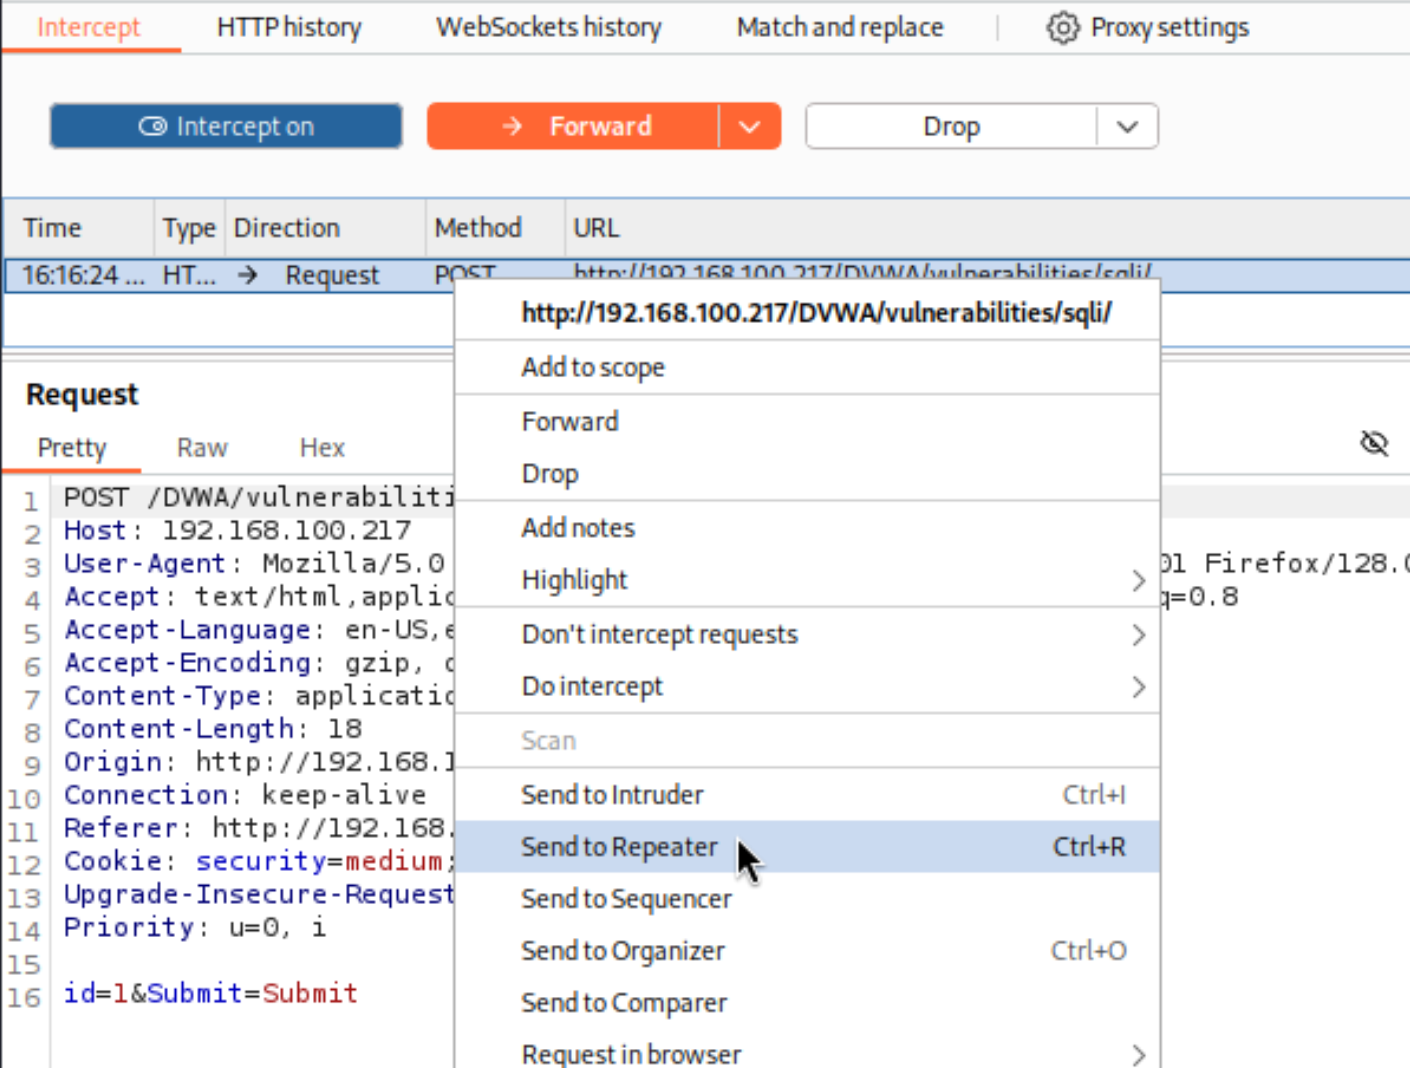

In [10]:
from IPython.display import Image

path = '/Users/melaniealvarez/Desktop/homework_2/imgs/prob2/'

Image(filename=path+'UNO.png', width=600)

**OR 1=1--**: The query bypasses the original logic since it makes the condition always TRUE. The two hyphens comment out the rest of the query, ignoring the password check or any other logic after it.

The code worked and we could acces to the users information.

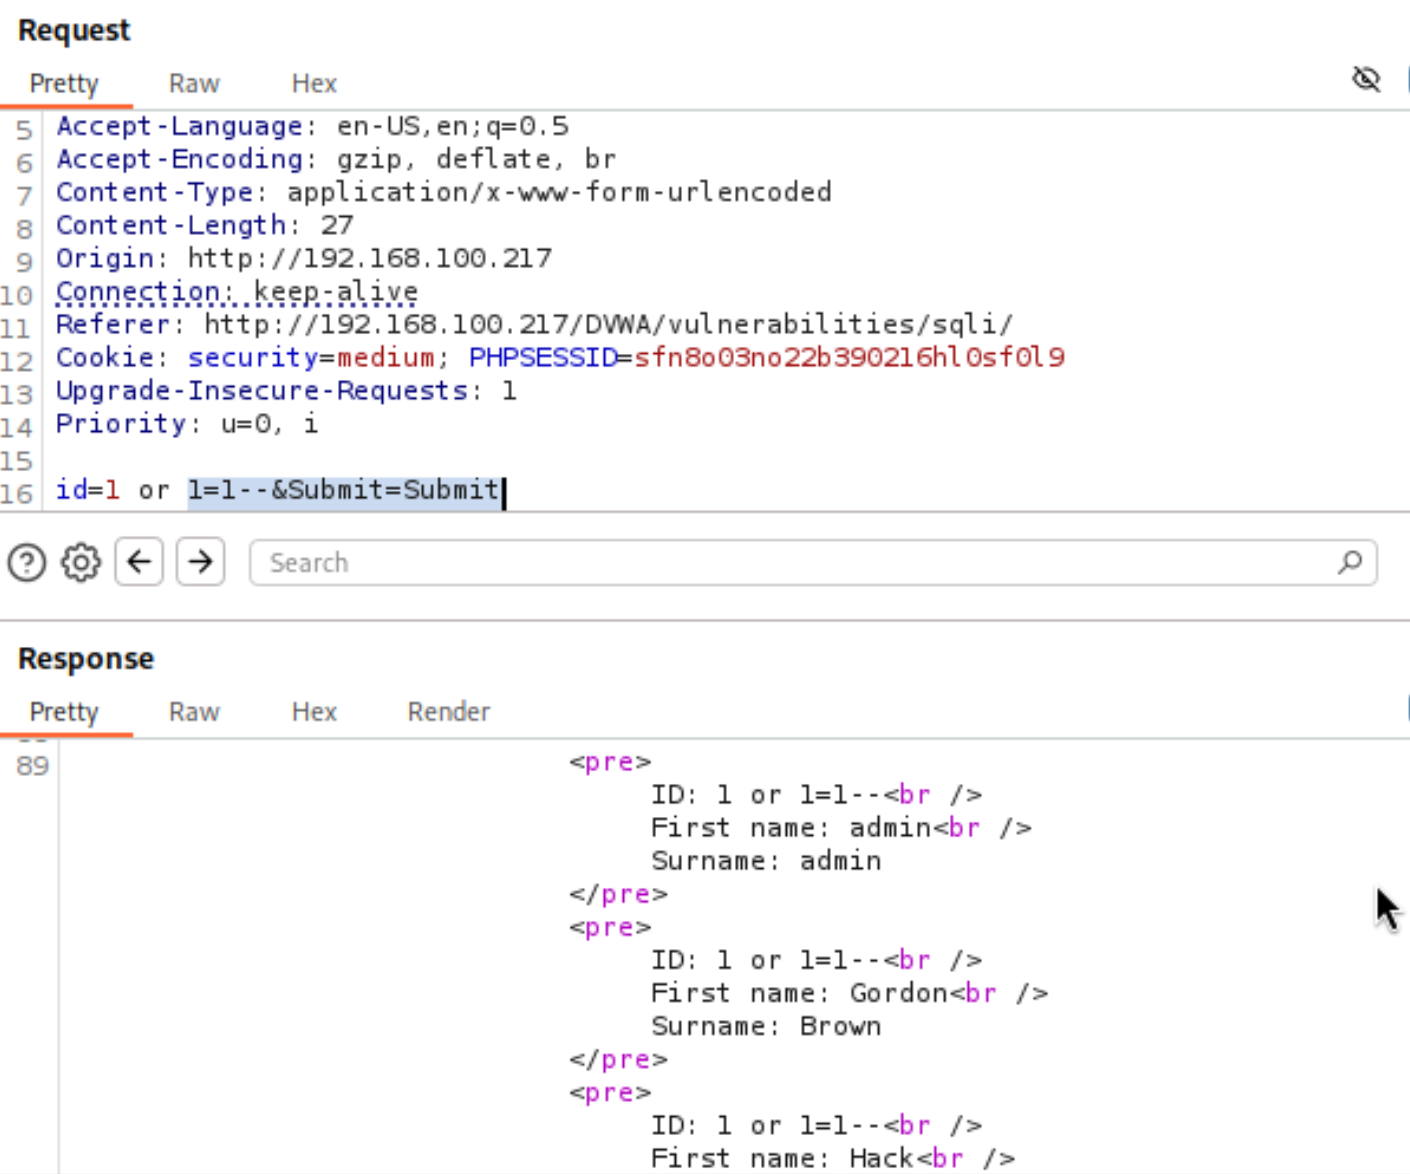

In [11]:
Image(filename=path+'DOS.png', width=600)

**UNION ALL SELECT DATABASE(), USER()--**: It combines the results of the original query with additional data. The function DATABASE() returns the current database and USER() the current database user. In summary, the query extracts information about the database for further explotation.

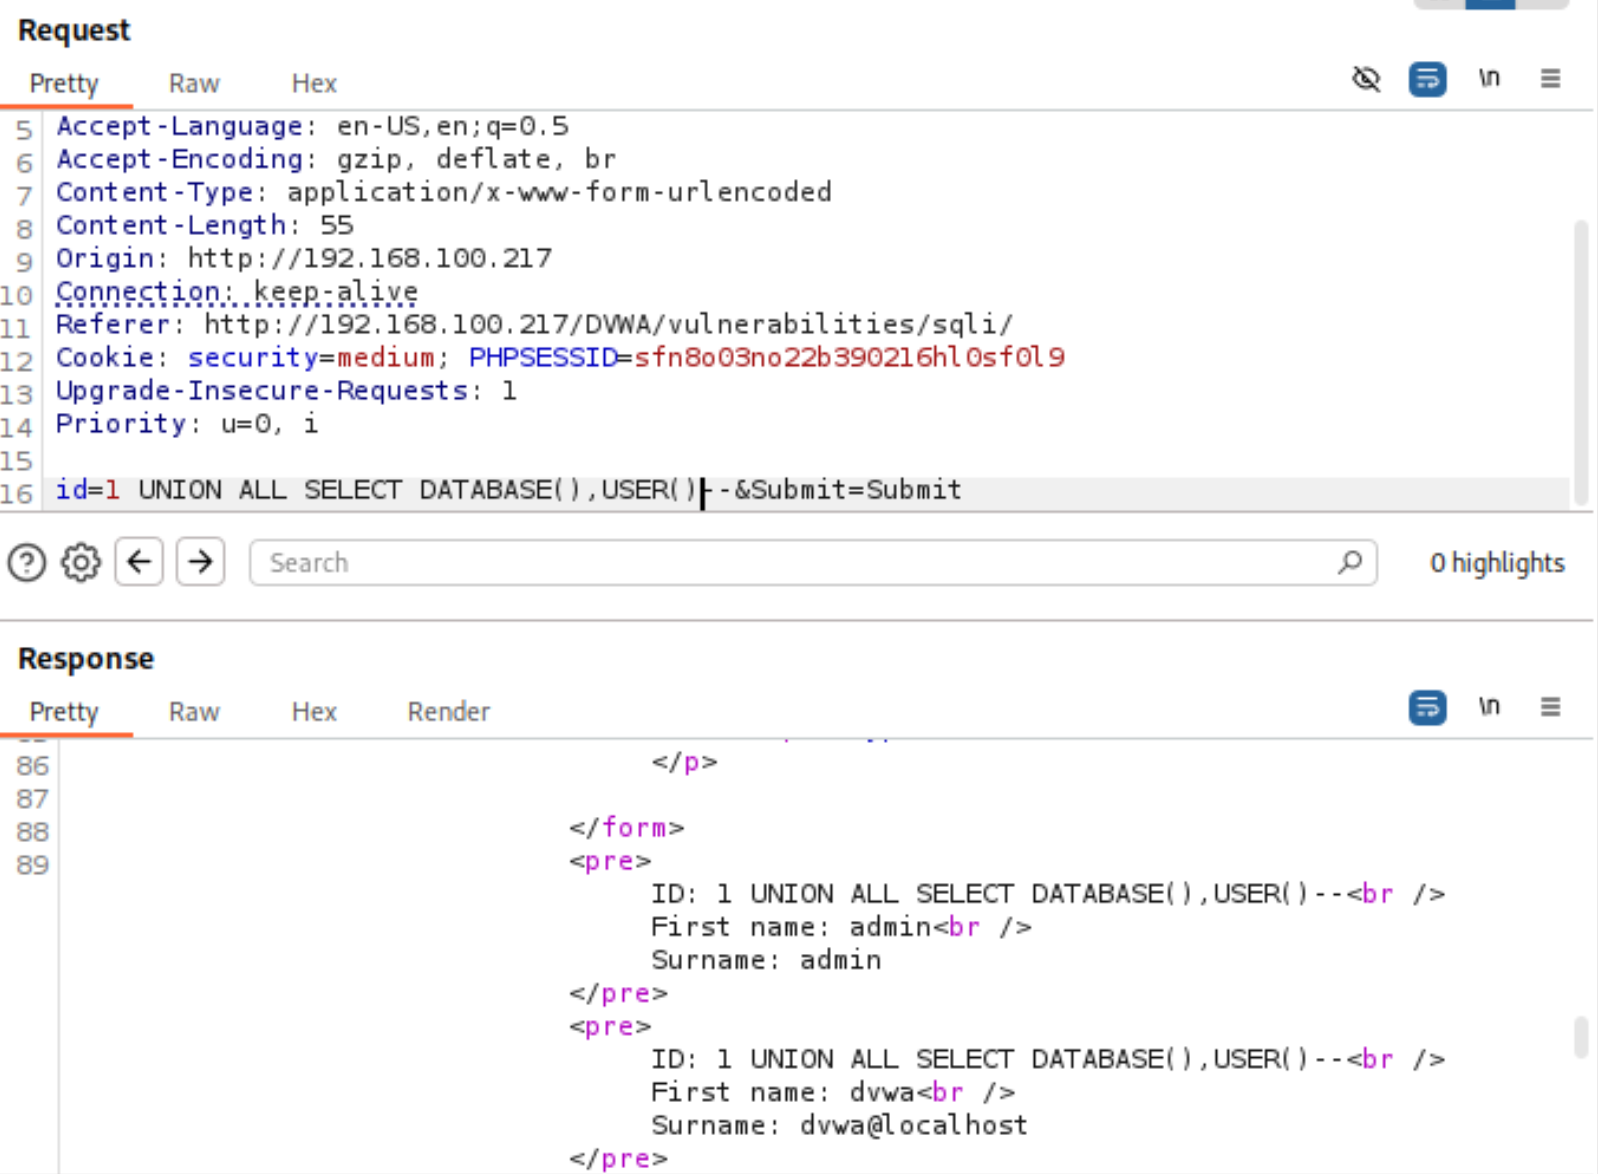

In [12]:
Image(filename=path+'TRES.png', width=600)

**UNION SELECT VERSION(), USER()#**: Like the image above, this query returns the version of the database and the current user.

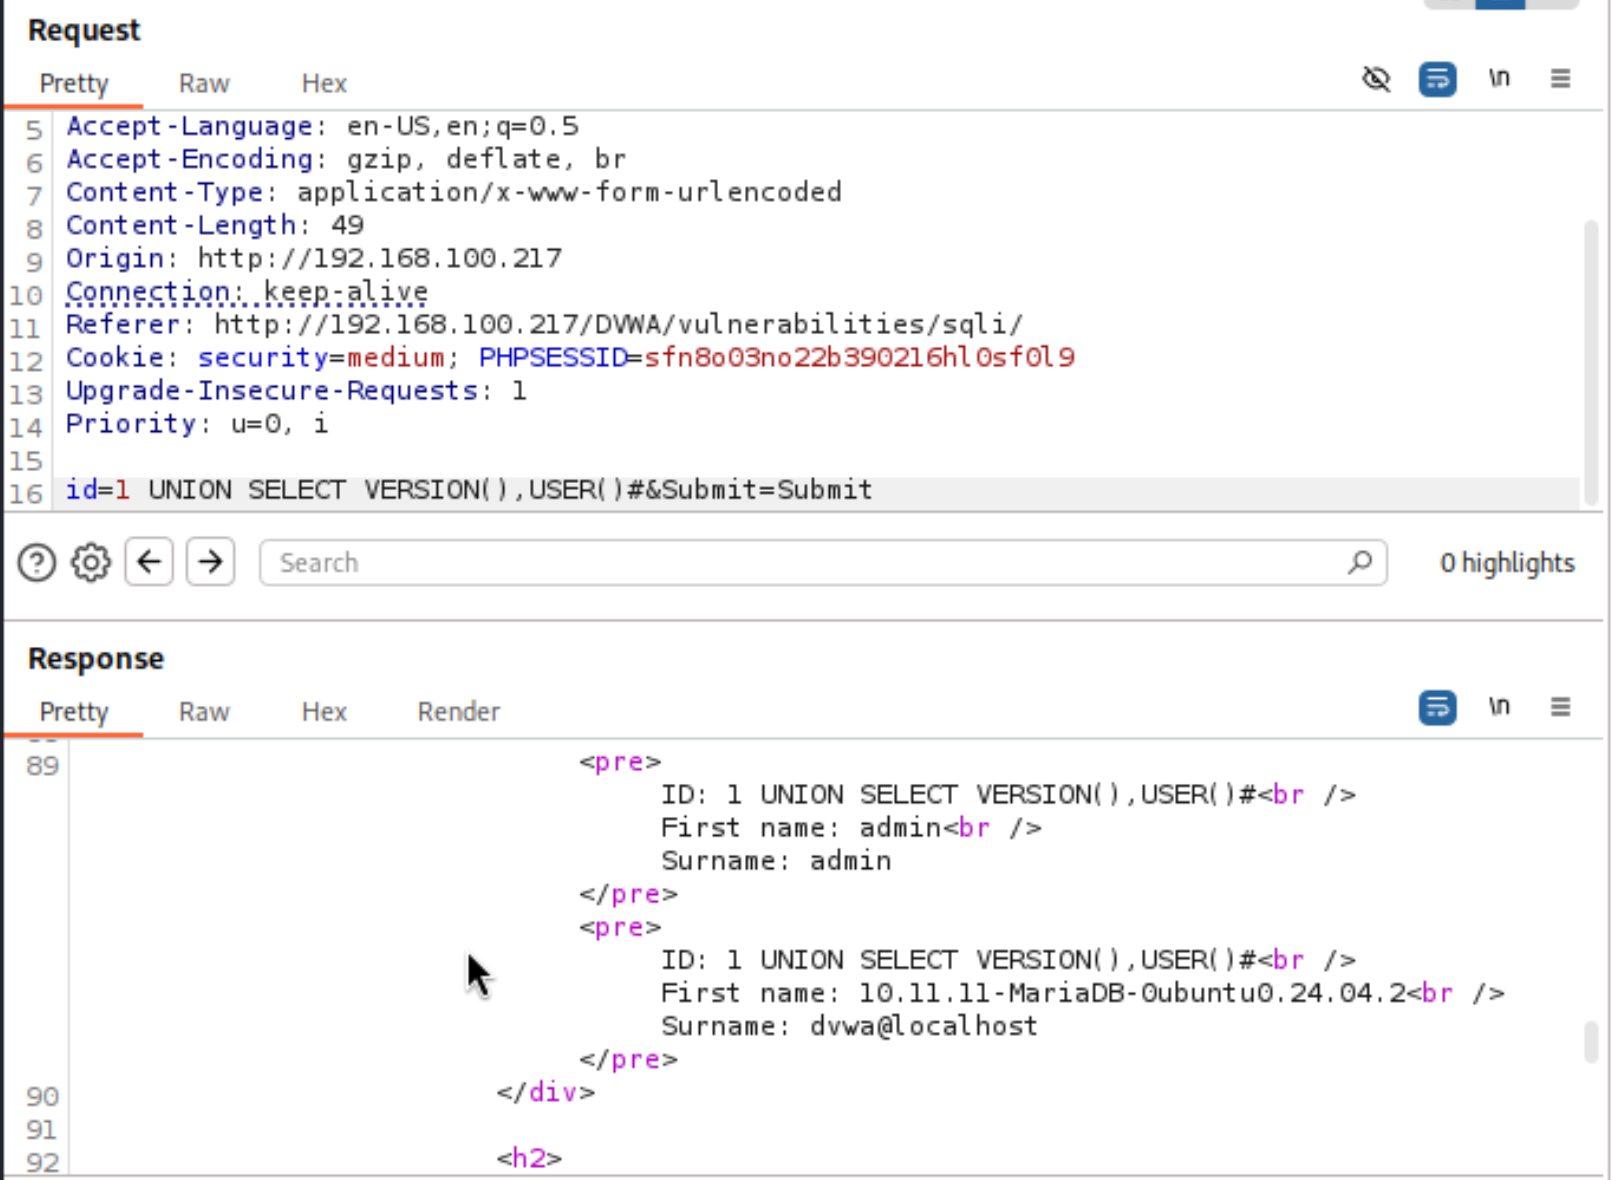

In [13]:
Image(filename=path+'CUATRO.png', width=600)

### Hard payloads

We tested with payloads similar to the medium level and they returned the expected data

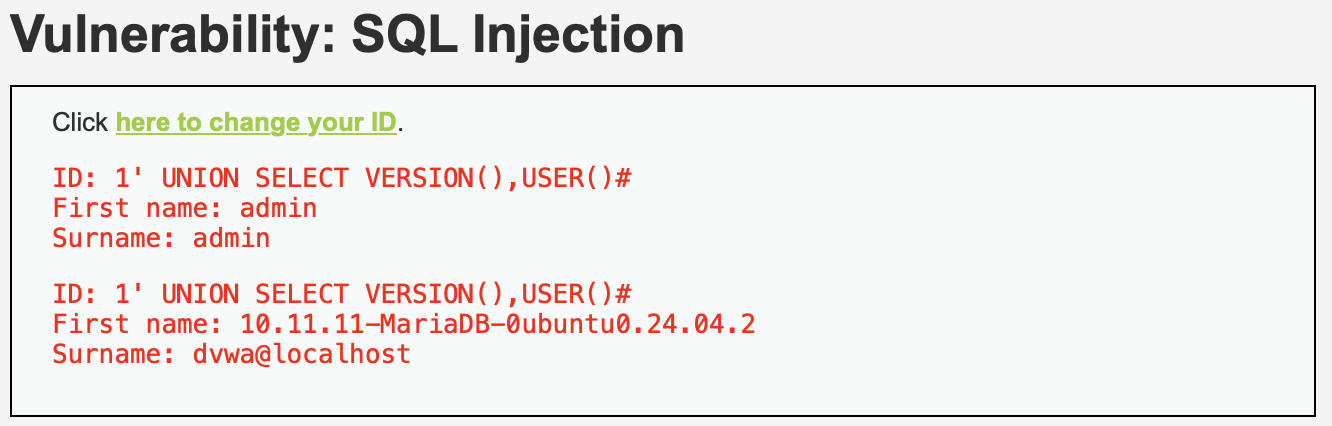

In [14]:
Image(filename=path+'pay1-hard.png', width=600)

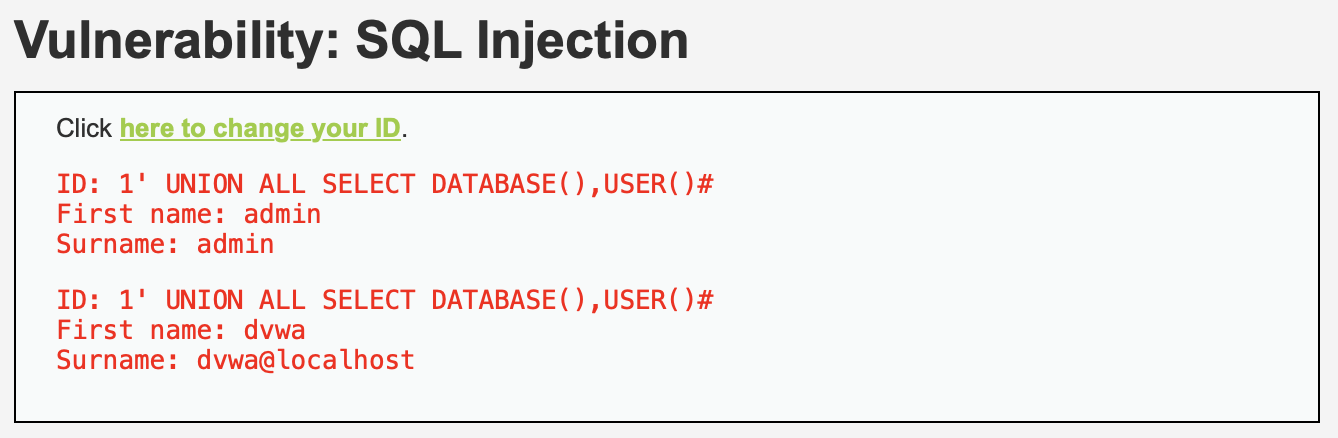

In [15]:
Image(filename=path+'pay2-hard.png', width=600)

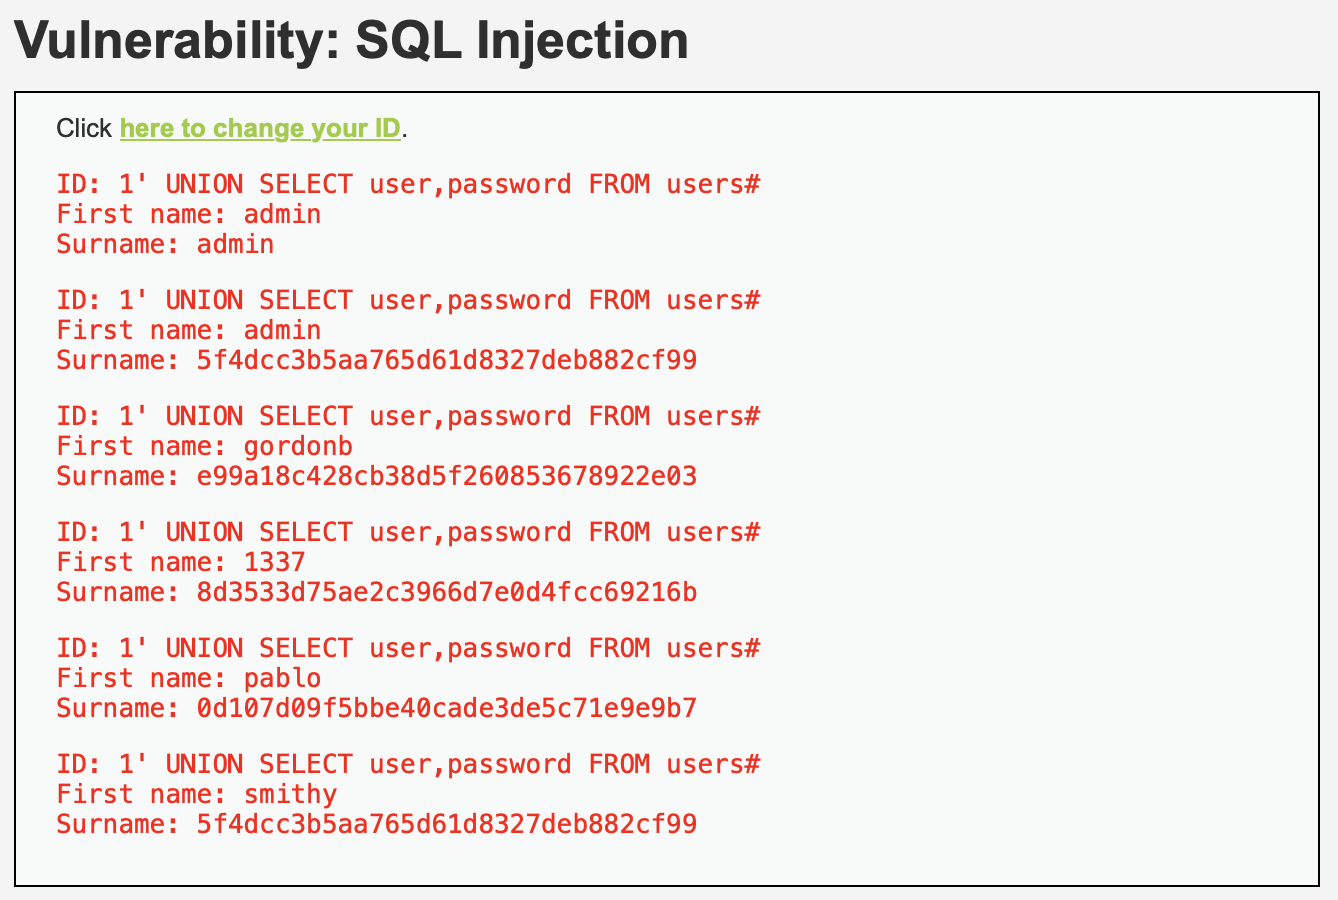

In [16]:
Image(filename=path+'pay3-hard.png', width=600)

## Security controls

**Medium Level**
* Basic Input Validation: The application performs some basic checks on user inputs, but many SQL injection techniques still work. It allows for simple attacks like OR 1=1 or UNION SELECT.
* Limited Sanitization: The input is not fully sanitized or prepared, allowing some SQL injection payloads to succeed.
* No Use of Prepared Statements: SQL queries are dynamically constructed, leaving the application vulnerable to SQL injection.
* Error Messages: The application may display detailed error messages, revealing information about the database, which helps attackers in crafting attacks.


**High Level**
* Stricter Input Validation: The application performs much stronger validation on user inputs, filtering out characters commonly used in SQL injection attacks (like ', --, etc.).
* Use of Prepared Statements: Queries are constructed using prepared statements or parameterized queries, making it impossible for user input to alter the structure of SQL commands.
* Output Encoding and Escaping: Any data reflected in the response is properly encoded, ensuring that any user input cannot be executed as part of an SQL command.
* Error Handling: Detailed error messages are disabled, and the application does not provide any useful information about the database structure to attackers.
* Database Permissions: The database user has restricted privileges, reducing the damage that could be done if an injection vulnerability is exploited.

## SQLMap

SQLmap is an open-source penetration testing tool designed to automate the process of detecting and exploiting SQL injection vulnerabilities in web applications. It identifies SQL injection flaws in web applications, it can retrieve database structure and information, it is commonly used for automated SQL injection testing, database discovery and privilege escalation.

The following command attempts to identify a SQL injection vulnerability in the id parameter and extract the user and passwd columns:\

* -u "http://192.168.100.217/DVWA/vulnerabilities/?id=1&Submit=Submit": This is the target URL with the SQL injection vulnerability. SQLmap will try to inject into the id parameter.

* --cookie="security=medium; PHPSESSID=sfn8003no22b390216hl0sf0l9": This option includes the session cookie for authentication or session management. It tells SQLmap to send this cookie along with the request.

* -p id: Specifies the parameter (id) to test for SQL injection. This tells SQLmap which part of the URL to focus on.
* --dbms=mysql: This tells SQLmap to assume the target database management system is MySQL, optimizing the injection techniques for MySQL.
* --level=5: Specifies the level of tests to be performed. A level of 5 means a thorough scan, which includes testing for various types of injection (e.g., time-based, error-based, UNION).
* --risk=3: Sets the risk level of the injection. A risk level of 3 indicates a higher risk of testing more aggressive attack vectors.
* --random-agent: This makes SQLmap use a random user-agent string for each request, which can help in evading detection by the server.
* --batch: This option makes SQLmap run in "batch" mode, meaning it will automatically provide default answers to all prompts (useful for non-interactive execution).
* --dump: This tells SQLmap to dump the contents of the database once an injection point is found.
* -T users: Specifies the target table to dump, which is the users table in this case.
* -C user,passwd: Specifies the columns to dump from the users table, which are the user and passwd (password) columns.


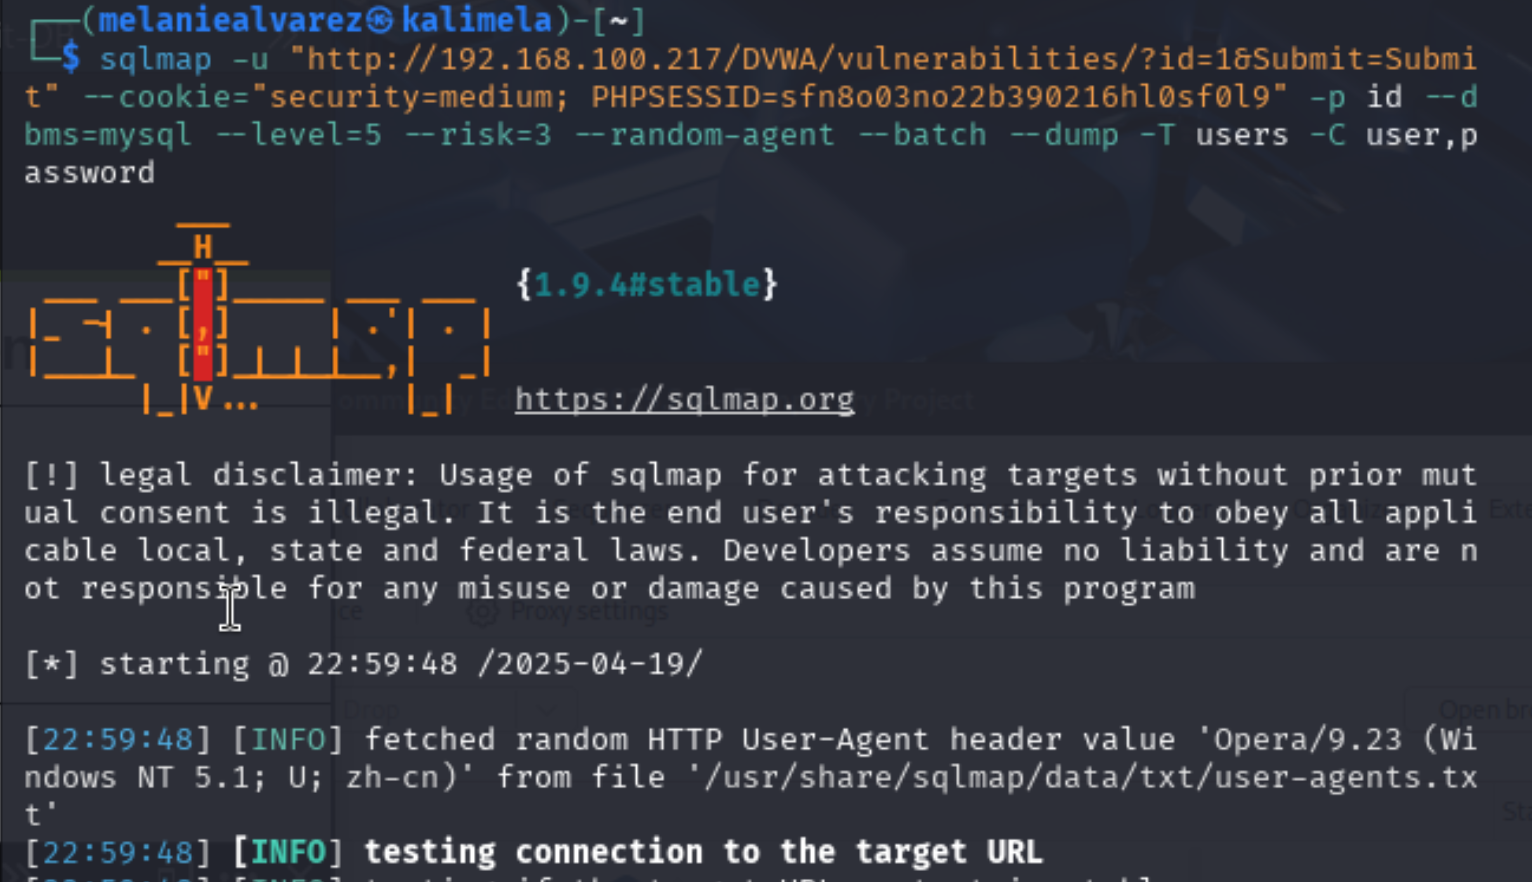

In [17]:
Image(filename=path+'sqlmap1.png', width=600)

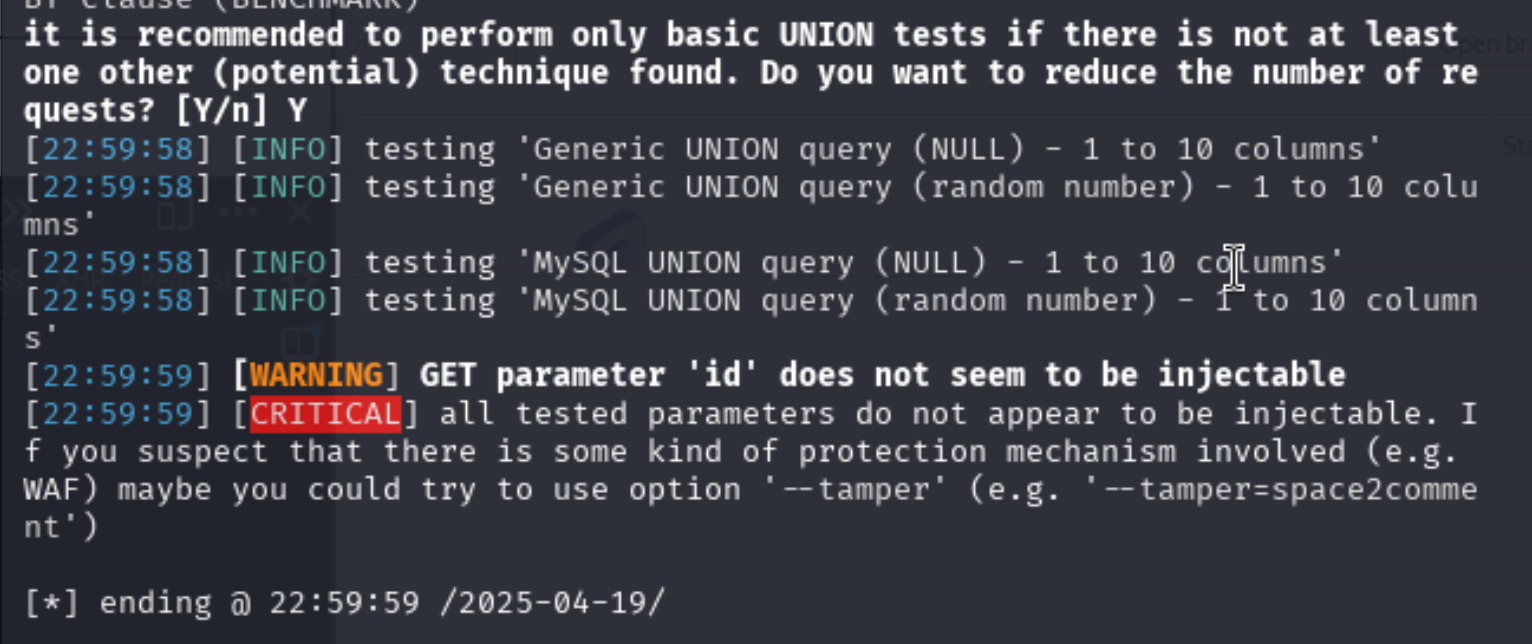

In [18]:
Image(filename=path+'sqlmap2.png', width=600)

## Failed attacks

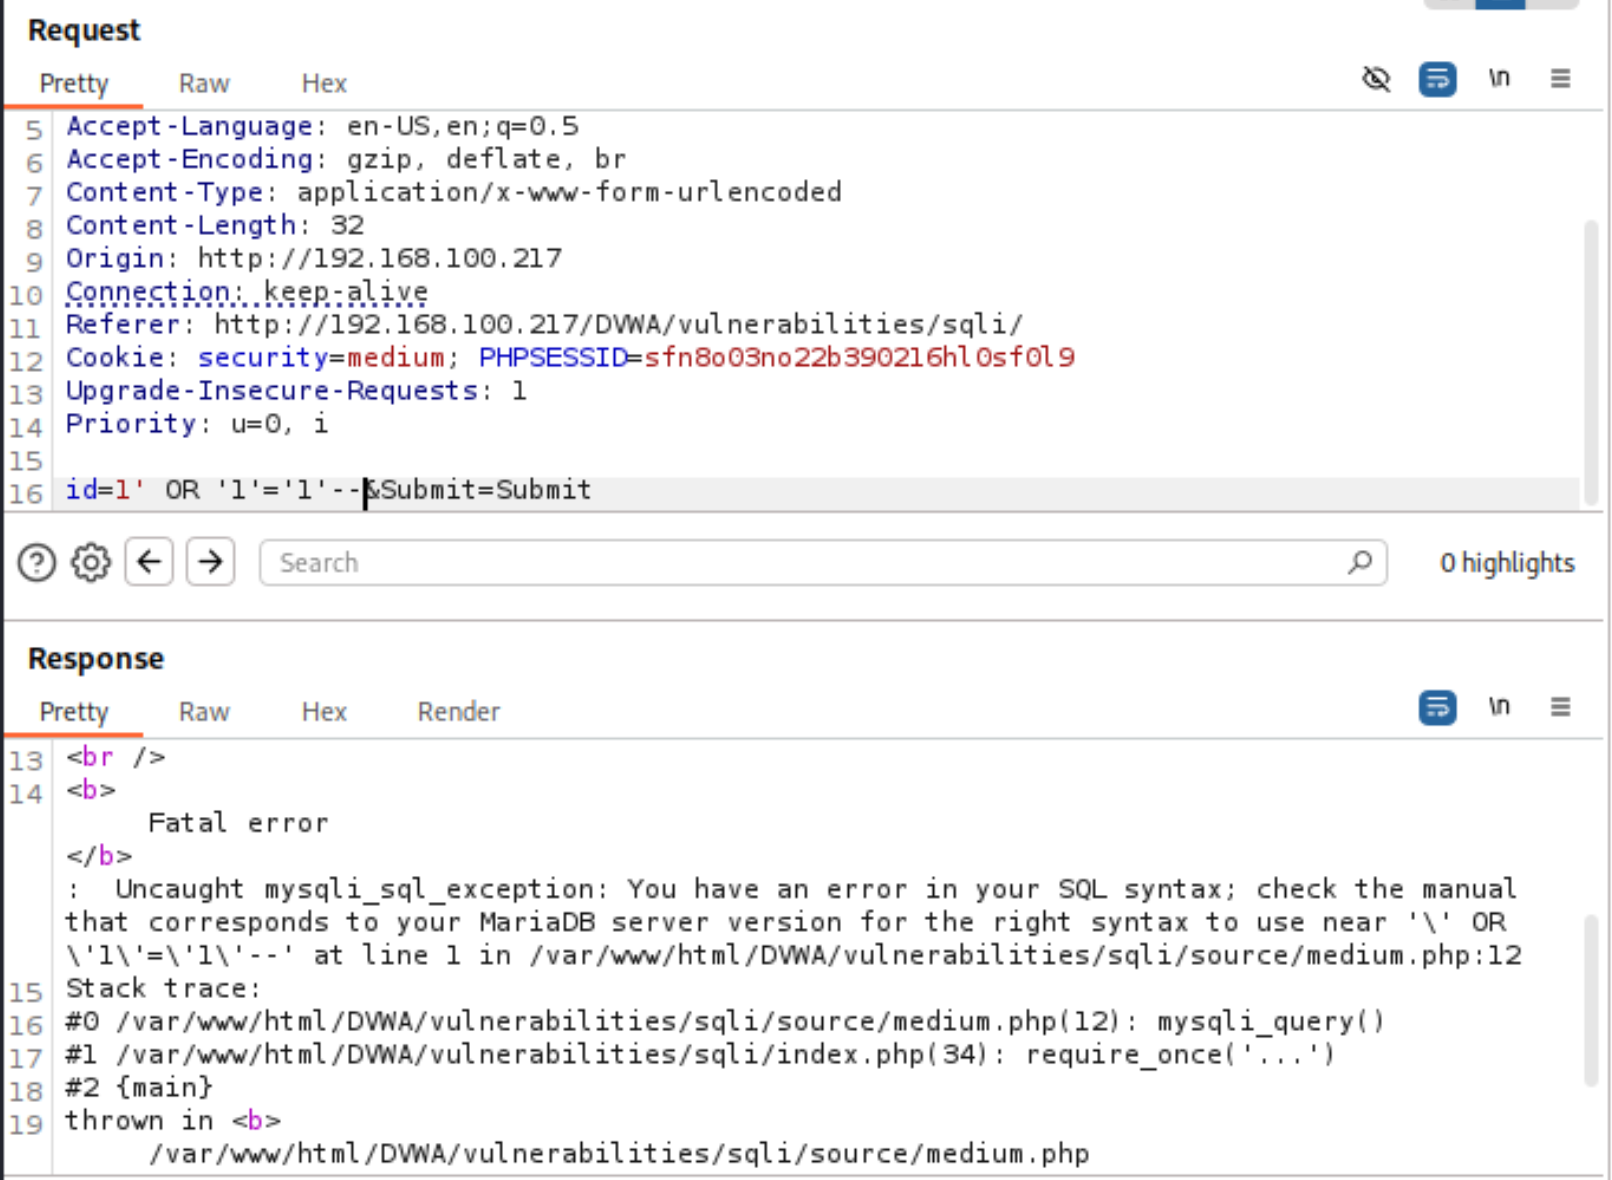

In [19]:
Image(filename=path+'fail1.png', width=600)

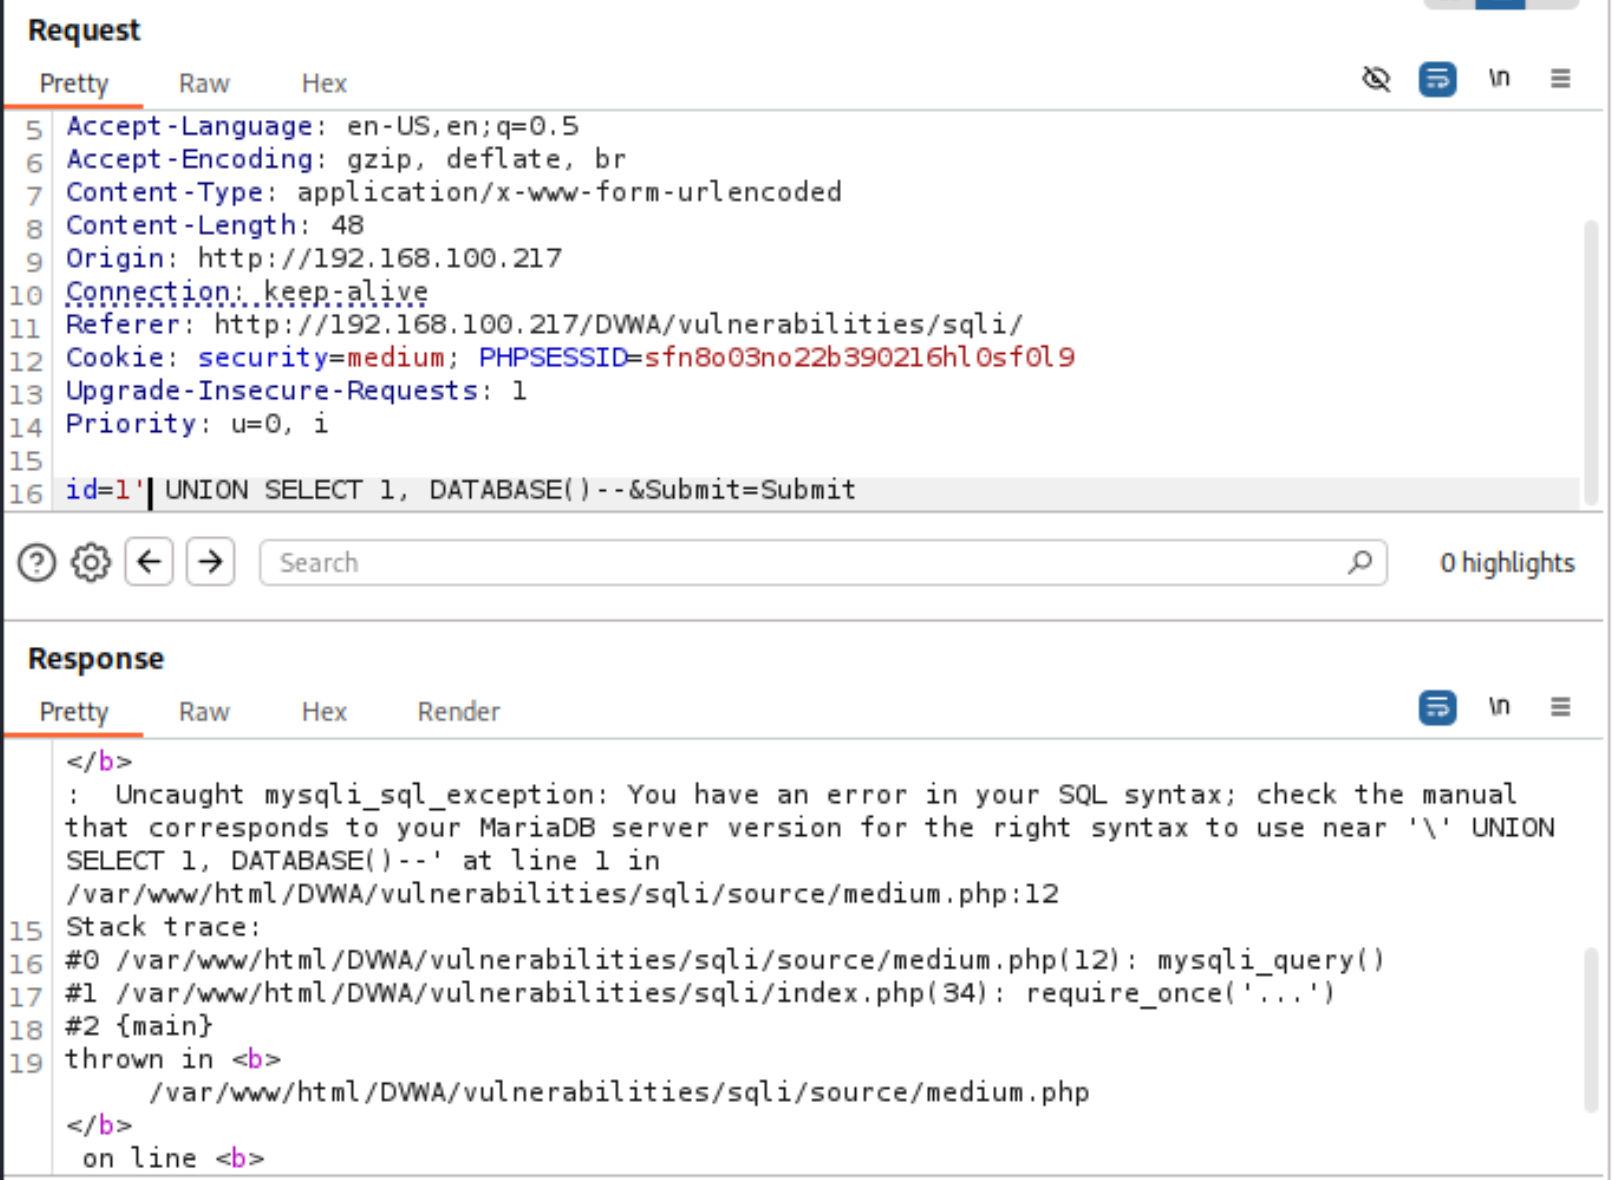

In [20]:
Image(filename=path+'fail2.png', width=600)

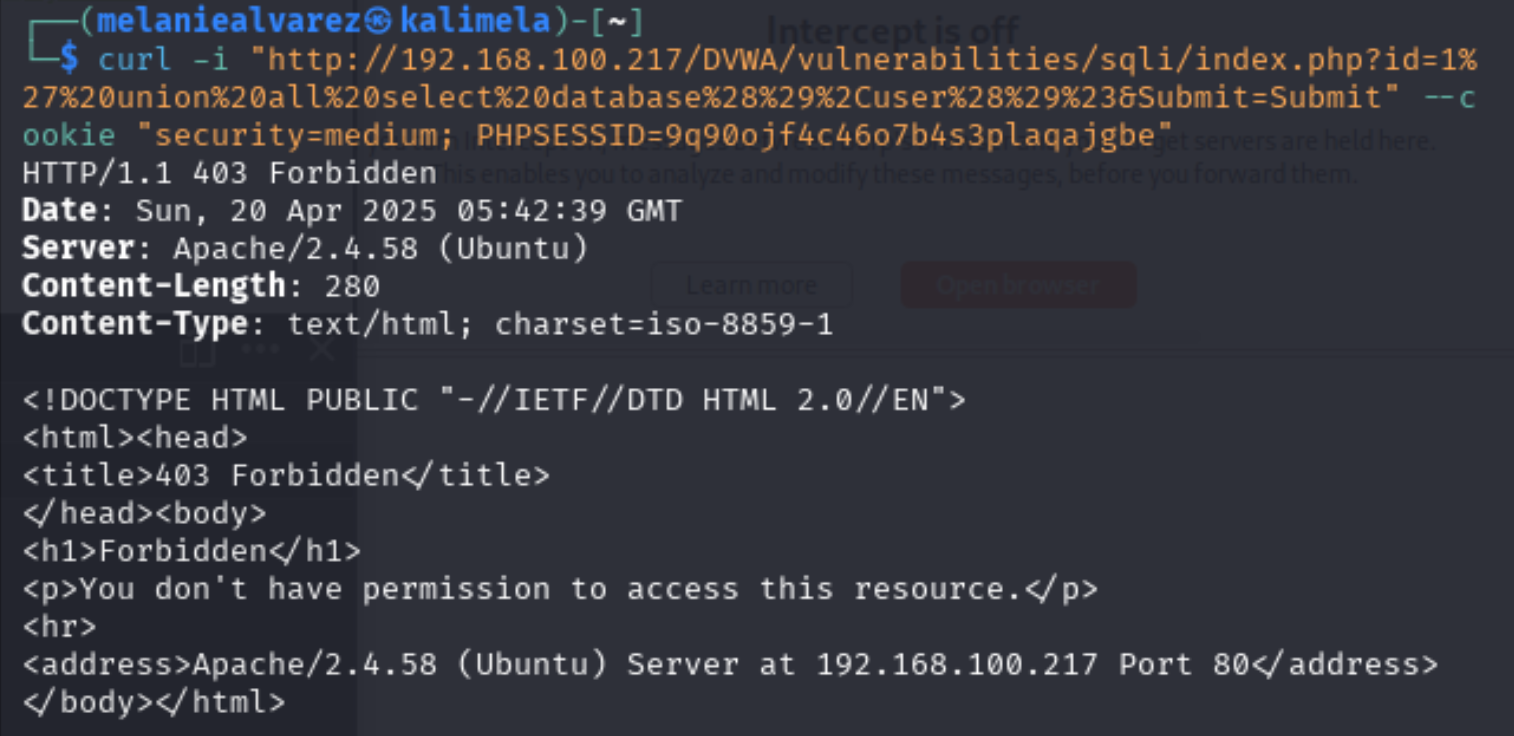

In [21]:
Image(filename=path+'fail3.png', width=600)

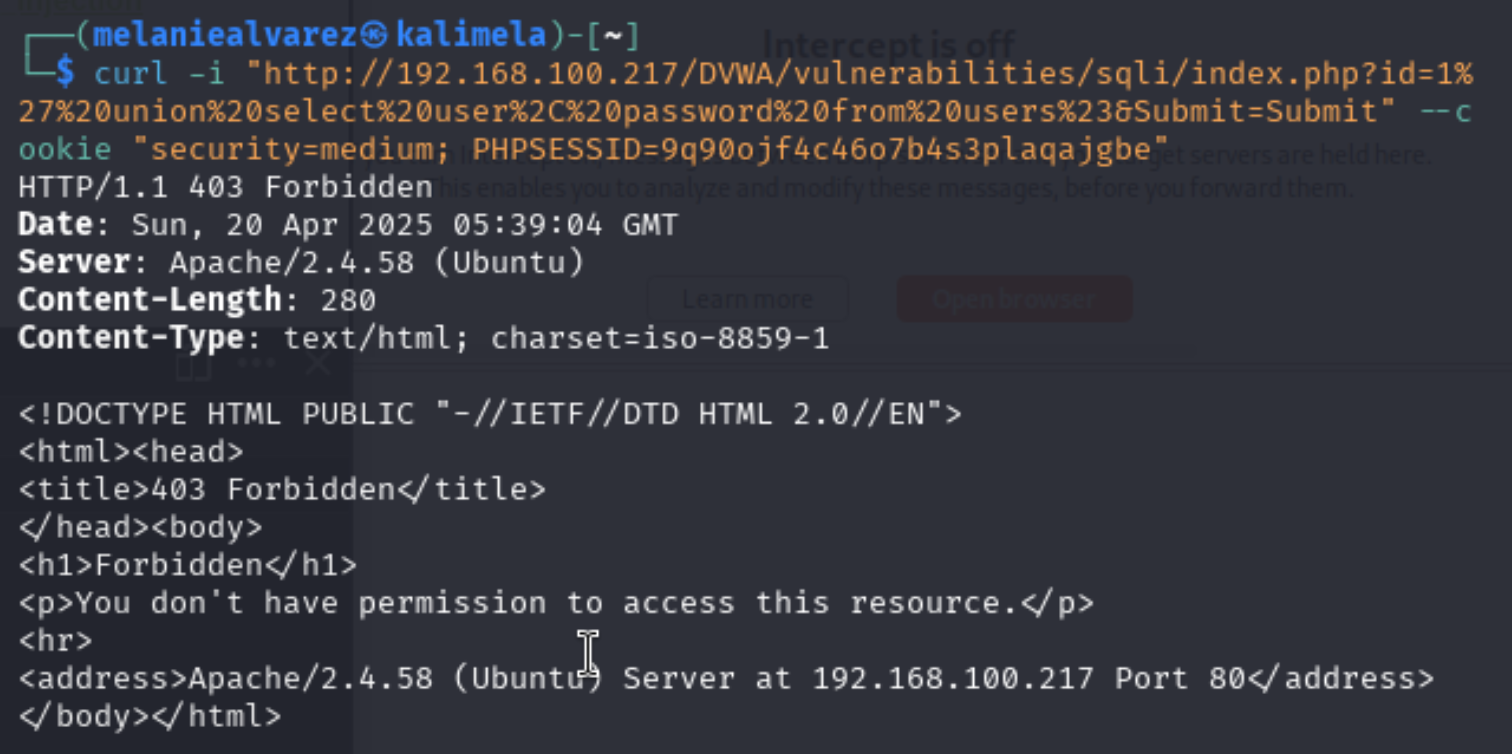

In [22]:
Image(filename=path+'fail4.png', width=600)

## Modsecurity rule configurations

ModSecurity is an open-source web application firewall (WAF) designed to protect web applications from various attacks. It allows administrators to filter and monitor HTTP traffic to detect and block malicious activity.

We implemented some custom rules to prevent SQL injection:

1. This rule blocks SQL injection attempts that use the UNION SELECT clause, which is commonly used to combine results from multiple SELECT queries.

2. This rule blocks boolean-based SQL injection, where attackers manipulate logic (AND or OR) to check if a condition is true or false.

3. This rule blocks time-based SQL injection attempts, where attackers use the SLEEP function to delay the response.

4. This rule blocks SQL injection attempts using hash comments (#), which allow attackers to comment out part of the SQL query, bypassing the logic.

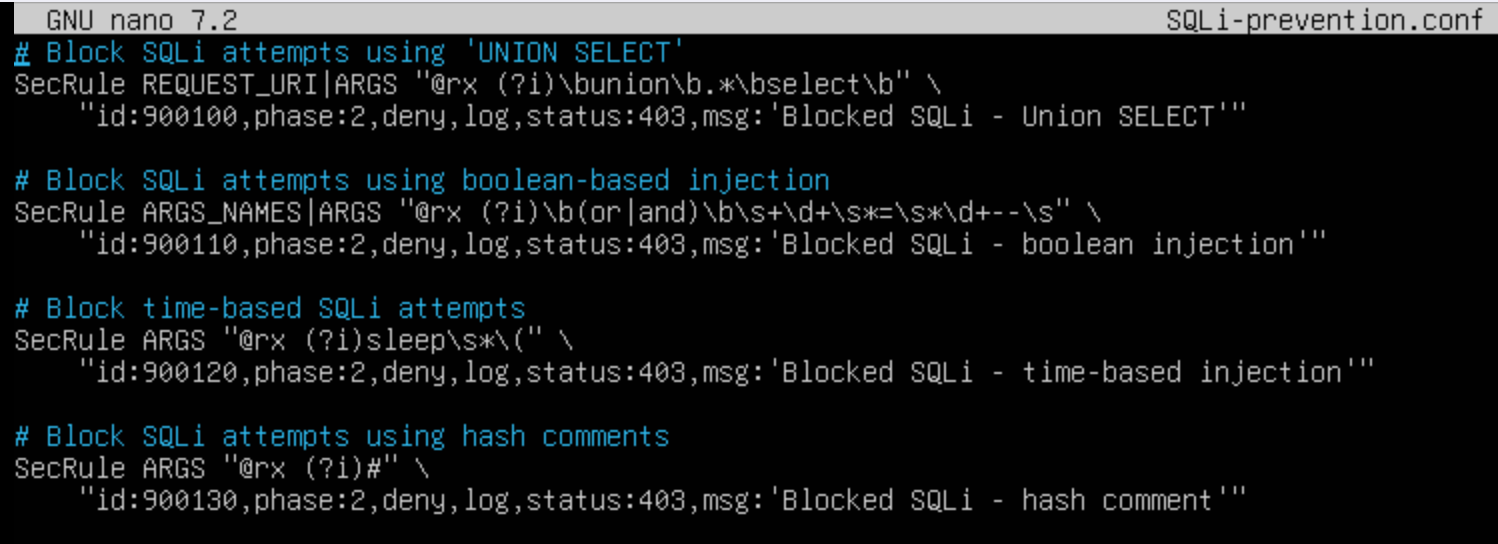

In [28]:
Image(filename=path+'rules.png', width=600)

The modsecurity.conf file is the main configuration file for ModSecurity. This file contains the settings that define how ModSecurity should function on the web server, such as which rules to apply, how to log requests, and how to respond to suspicious activity. We included our custom_rules in the file.

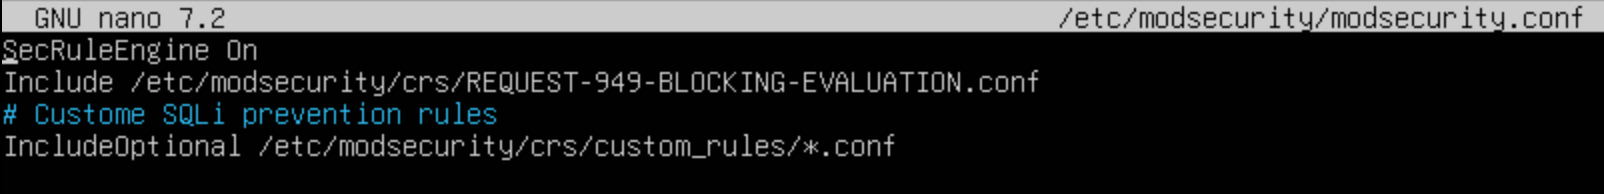

In [30]:
Image(filename=path+'include.png', width=700)

## SQLi prevention strategies

1. **Use Prepared Statements (Parameterized Queries):** They ensure that SQL code and data are sent separately to the database, preventing user input from being executed as SQL code.

2. **Use Stored Procedures:** Stored procedures are predefined SQL queries stored in the database that can be executed with specific parameters.

3. **Input Validation and Sanitization:** It involves validating and sanitizing user input to ensure that only allowed data is processed by the application (numbers, alphanumeric characters).

4. **Least Privilege Principle:** Ensure that the database user account used by the application has the minimum necessary privileges (no DELETE or DROP permissions).